# Experimentation for nlp hw1

In [3]:
%load_ext autoreload
%autoreload 2
from preprocessing import *
from speech import *
import numpy as np
from tqdm import tqdm
from supervised_experiments import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
fname = "speech.tar.gz"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### General submission code

In [4]:
data = Data(fname)
data.preprocess(CountVectorizer(tokenizer = SamsTokenizer(), 
                                stop_words = "english", min_df = 2),
                svd = TruncatedSVD(n_components = 2500))
clf = LogisticRegression(solver = "saga", penalty = 'l2')
clf.fit(data.train_x, data.train_y)

# Train performance
preds = clf.predict(data.val_x)
train_acc = accuracy_score(clf.predict(data.train_x), data.train_y)

#Val performance
val_acc =  accuracy_score(data.val_y, preds)
ic(val_acc)


ic("Reading unlabeled data")
unlabeled = read_unlabeled("data/" + fname, data)
print("Writing pred file")
write_pred_kaggle_file(unlabeled, clf, "speech-pred.csv", data)

# # # You can't run this since you do not have the true labels
# # # ic "Writing gold file"
# # # write_gold_kaggle_file("data/speech-unlabeled.tsv", "data/speech-gold.csv")
# # # w:rite_basic_kaggle_file("data/speech-unlabeled.tsv", "data/speech-basic.csv")

ic| '-- train data'


KeyboardInterrupt: 

## Supervised Experiments

### Initial exploration

In [ ]:
fname = "speech.tar.gz"
preprocessors = [
    CountVectorizer(lowercase = False, tokenizer = SamsTokenizer(punct = True,lower = False)),
    CountVectorizer(tokenizer = SamsTokenizer(punct = True)),
    CountVectorizer(tokenizer = SamsTokenizer()),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer()),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 2),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 3),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 4),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 5),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 6),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 7),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 8),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 9),
    CountVectorizer(stop_words="english", tokenizer = SamsTokenizer(), min_df = 10),
]

d = dimensionality_exploration(fname, preprocessors)

In [ ]:
d

### Feature ablation

In [16]:
fname = "speech.tar.gz"

feat_list = {
    "cv":CountVectorizer(),
    "cv_lemma": CountVectorizer(tokenizer = SamsTokenizer()),
    "cv_stopw": CountVectorizer(stop_words = "english"),
    "cv_lemma_stopw":CountVectorizer(stop_words = "english", tokenizer = SamsTokenizer()),
    "tfidf":TfidfVectorizer(),
    "tfidf_lemma": TfidfVectorizer(tokenizer = SamsTokenizer()),
    "tfidf_stopw": TfidfVectorizer(stop_words = "english"),
    "tfidf_lemma_stopw":TfidfVectorizer(stop_words = "english", tokenizer = SamsTokenizer()),
}

In [17]:
a1 = feature_ablation(fname, feat_list)

ic| '-- train data'
ic| member.name: 'train.tsv'
ic| len(self.train_data): 4370
ic| '-- val data'
ic| member.name: 'dev.tsv'
ic| len(self.val_data): 414


In [18]:
a1

{'cv': 0.41304347826086957,
 'cv_lemma': 0.4227053140096618,
 'cv_stopw': 0.39855072463768115,
 'cv_lemma_stopw': 0.42028985507246375,
 'tfidf': 0.3743961352657005,
 'tfidf_lemma': 0.3864734299516908,
 'tfidf_stopw': 0.38164251207729466,
 'tfidf_lemma_stopw': 0.38405797101449274}

### Dimensionality Ablation

In [19]:
data = Data(fname)
data.preprocess(feat_list["cv_lemma"], norm = True)
print(data.train_x.shape)
print(data.val_x.shape)
# sys.exit(1)
comp_list = [100,500, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
a2 = dimensionality_ablation(data, comp_list)

ic| '-- train data'
ic| member.name: 'train.tsv'
ic| len(self.train_data): 4370
ic| '-- val data'
ic| member.name: 'dev.tsv'
ic| len(self.val_data): 414


(4370, 7671)
(414, 7671)


In [20]:
a2

{100: 0.28502415458937197,
 500: 0.34057971014492755,
 1000: 0.36231884057971014,
 1500: 0.3647342995169082,
 2000: 0.35990338164251207,
 2500: 0.3647342995169082,
 3000: 0.35990338164251207,
 4000: 0.35990338164251207,
 5000: 0.35990338164251207}

In [21]:
data = Data(fname)
data.preprocess(feat_list["cv_lemma"], norm = False)
print(data.train_x.shape)
print(data.val_x.shape)
# sys.exit(1)
comp_list = [100,500, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
a2_2 = dimensionality_ablation(data, comp_list)

ic| '-- train data'
ic| member.name: 'train.tsv'
ic| len(self.train_data): 4370
ic| '-- val data'
ic| member.name: 'dev.tsv'
ic| len(self.val_data): 414


(4370, 7671)
(414, 7671)


In [22]:
a2_2

{100: 0.30676328502415456,
 500: 0.38405797101449274,
 1000: 0.4251207729468599,
 1500: 0.42028985507246375,
 2000: 0.42995169082125606,
 2500: 0.4227053140096618,
 3000: 0.4251207729468599,
 4000: 0.4227053140096618,
 5000: 0.4227053140096618}

### Model ablation

In [24]:
data = Data(fname)
data.preprocess(feat_list["cv_lemma"], norm = False)
svd = TruncatedSVD(n_components = 2000)
data.train_x = svd.fit_transform(data.train_x)
data.val_x = svd.transform(data.val_x)
solvers = ["lbfgs", "liblinear", "saga", "newton-cg", "sag"]
penalties = ["l1", "l2", 'none']
a3 = solver_pen_ablation(data.train_x, data.train_y, data.val_x, data.val_y, solvers, penalties)

ic| '-- train data'
ic| member.name: 'train.tsv'
ic| len(self.train_data): 4370
ic| '-- val data'
ic| member.name: 'dev.tsv'
ic| len(self.val_data): 414


Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
penalty='none' is not supported for the liblinear solver
Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.
Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


In [25]:
a3

{'l1': {'lbfgs': '-',
  'liblinear': 0.4082125603864734,
  'saga': 0.41304347826086957,
  'newton-cg': '-',
  'sag': '-'},
 'l2': {'lbfgs': 0.4227053140096618,
  'liblinear': 0.4057971014492754,
  'saga': 0.42028985507246375,
  'newton-cg': 0.4227053140096618,
  'sag': 0.4227053140096618},
 'none': {'lbfgs': 0.3888888888888889,
  'liblinear': '-',
  'saga': 0.4178743961352657,
  'newton-cg': 0.38405797101449274,
  'sag': 0.4251207729468599}}

### Vocabulary Plots

In [ ]:
# Without stopwords
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(len(vocabulary_sorted)), [item[1] for item in vocabulary_sorted])


In [ ]:
speech.count_vect = CountVectorizer(stop_words = "english")#, tokenizer = LemmaTokenizer())
matrix = speech.count_vect.fit_transform(speech.train_data)
print(matrix.shape)
freqs = zip(speech.count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
vocabulary_sorted = sorted(freqs, key=lambda x: -x[1])
print(type(vocabulary_sorted))

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer as lemmatizer
lemmatizer = lemmatizer()
voc_l = [lemmatizer.lemmatize(i[0]) for i in vocabulary_sorted]
print(len(list(set(voc_l))))


In [ ]:
# Without stopwords
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(len(vocabulary_sorted)), [item[1] for item in vocabulary_sorted])


## Unsupervised experiments

### Vectorize input in preparation for Word2Vec

In [3]:
data = read_unlabeled("data/" + 
                      fname, None)

In [7]:
print(len(data.data))
# print(data.data[0])

43342
b'must always seek to protect our national security by aggressively gathering intelligence in accordance with proven methods. Yet we cannot'


In [29]:
tokenizer = CountVectorizer(stop_words = "english",
                            tokenizer = SamsTokenizer(),
                           )
                            
def sentence_parser(sentences,tokenizer):
    res_sentences = []
    
    for s in tqdm(sentences):
        res_sentences.append(tokenizer(s.decode('utf-8')))
    return res_sentences
    

In [48]:
data.parsed_unlabeled_data = sentence_parser(data.data, 
                                SamsTokenizer, WordNetLemmatizer())

100%|██████████| 43342/43342 [00:04<00:00, 9038.55it/s]


In [46]:
labeled_data = Data(fname)
data.parsed_labeled_data = sentence_parser(labeled_data.train_data, 
                                           tokenizer, 
                                           WordNetLemmatizer())
                                           

ic| '-- train data'
ic| member.name: 'train.tsv'
ic| len(self.train_data): 4370
ic| '-- val data'
ic| member.name: 'dev.tsv'
ic| len(self.val_data): 414
100%|██████████| 4370/4370 [00:00<00:00, 10393.85it/s]


In [100]:
data.full_parsed_data = data.parsed_labeled_data + data.parsed_unlabeled_data

### Make embedding models

In [36]:
from gensim.models import Word2Vec

# for i in range(1,10):
#     l = len(data.parsed_unlabeled_data)
#     data.full_parsed_data = data.parsed_labeled_data +\
#     data.parsed_unlabeled_data[:(l//10)*i]
#     print(len(data.full_parsed_data))
#     model = Word2Vec(sentences=data.full_parsed_data,
#                  size=100,
#                  window=5,
#                  min_count=1, workers=1)
#     model.save("models/word2vec_" + str(i*10) + "ul.model")

# model =  Word2Vec(sentences=data.full_parsed_data,
#                  size=100,
#                  window=5,
#                  min_count=1, workers=10)

model = Word2Vec.load('models/word2vec_100ul.model')

### Visualize Embeddings

In [123]:
test = ['health', 'care', 'healthcare', 'war', 'soldier', 'afghanistan',
        'iraq','gun','bear', 'clinton','mccain', 'terrorism', 'control',
        'obama','fighting','budget','money', 'deficit', 'candidate']

embeddings = [model[i] for i in test]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

res = pca.fit_transform(embeddings)

<ipython-input-123-e2326fb03f62>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings = [model[i] for i in test]


(19,) (19,)


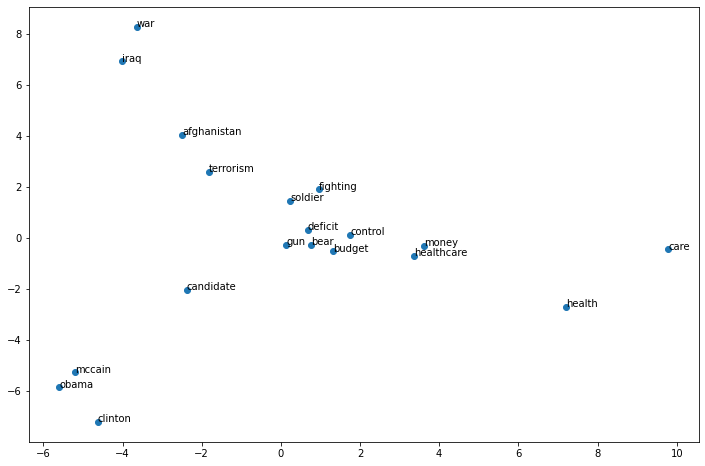

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12,8))
print(res[:,0].shape, res[:,1].shape)
plt.scatter(res[:,0].flatten(),res[:,1].flatten())
for i, text in enumerate(test):
    plt.annotate(text, (res[i,0],res[i,1]))

### Run experiment with Word2Vec

In [42]:
from unsupervised_experiments import *

In [57]:
models = ['word2vec_{}ul.model'.format(i*10) for i in range(1,11)]
models

['word2vec_10ul.model',
 'word2vec_20ul.model',
 'word2vec_30ul.model',
 'word2vec_40ul.model',
 'word2vec_50ul.model',
 'word2vec_60ul.model',
 'word2vec_70ul.model',
 'word2vec_80ul.model',
 'word2vec_90ul.model',
 'word2vec_100ul.model']

In [ ]:
w2v_ablation(models, fname, LogisticRegression)

ic| '-- train data'
ic| member.name: 'train.tsv'
